In [72]:
import pandas as pd

# Plotting
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [73]:
df = pd.read_csv(
    filepath_or_buffer="Math-Students.csv"
)

- school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
- sex - student's sex (binary: 'F' - female or 'M' - male)
- age - student's age (numeric: from 15 to 22)
- address - student's home address type (binary: 'U' - urban or 'R' - rural)
- famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
- Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
- Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
- Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
- Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'athome' or 'other')
- Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g., administrative or police), 'at home' or 'other')
- reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
guardian - student's guardian (nominal: 'mother', 'father' or 'other')
traveltime - home to school travel time (numeric: 1 - 4 hours)
studytime - weekly study time (numeric: 1 - 10 hours)
failures - number of past class failures (numeric: n if 1 or more)
schoolsup - extra educational support (binary: yes or no)
famsup - family educational support (binary: yes or no)
paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
activities - extra-curricular activities (binary: yes or no)
nursery - attended nursery school (binary: yes or no)
- higher - wants to take higher education (binary: yes or no)
- internet - Internet access at home (binary: yes or no)
- romantic - with a romantic relationship (binary: yes or no)
- famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
- freetime - free time after school (numeric: from 1 - very low to 5 - very high)
- goout - going out with friends (numeric: from 1 - very low to 5 - very high)
- Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
- Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
- health - current health status (numeric: from 1 - very bad to 5 - very good)
- absences - number of school absences (numeric: from 0 to 93)

These grades are related to the course subject, Math:
- G1 - first period grade (numeric: from 0 to 20)
- G2 - second-period grade (numeric: from 0 to 20)
- G3 - final grade (numeric: from 0 to 20, output target)

## Data Understanding and Cleaning

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      399 non-null    object
 1   sex         399 non-null    object
 2   age         399 non-null    int64 
 3   address     399 non-null    object
 4   famsize     399 non-null    object
 5   Pstatus     399 non-null    object
 6   Medu        399 non-null    int64 
 7   Fedu        399 non-null    int64 
 8   Mjob        399 non-null    object
 9   Fjob        399 non-null    object
 10  reason      399 non-null    object
 11  guardian    399 non-null    object
 12  traveltime  399 non-null    int64 
 13  studytime   399 non-null    int64 
 14  failures    399 non-null    int64 
 15  schoolsup   399 non-null    object
 16  famsup      399 non-null    object
 17  paid        399 non-null    object
 18  activities  399 non-null    object
 19  nursery     399 non-null    object
 20  higher    

In [75]:
for column in df.columns:
    number_na = df[column].isnull().sum()
    if number_na > 1:
        print(f"Pay attentin to {column} column.\n \
              It has {number_na} missing values")

In [76]:
# Show min and max for numeric columns
df_range_num = (
    df
    .select_dtypes(include="number")
    .agg(["min", "max"])
)

print("Min-Max Range for Numeric Columns:")
print(df_range_num)

Min-Max Range for Numeric Columns:
     age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  \
min   15     0     0           1          1         0       1         1   
max   22     4     4           4          4         3       5         5   

     goout  Dalc  Walc  health  absences  G1  G2  G3  
min      1     1     1       1         0   3   0   0  
max      5     5     5       5        75  19  19  20  


In [77]:
data_dictonary_summary = dict()

for column in df.columns:
    number_of_unique = len(df[column].unique())
    column_type = df.dtypes[column]
    example_values = df.loc[:5, column].to_list()

    data_dictonary_summary[column] = [
        number_of_unique,
        column_type,
        example_values
    ]

In [78]:
pd.DataFrame(data_dictonary_summary).melt()

,variable,value
0,school,2
1,school,object
2,school,"[GP, GP, GP, GP, GP, GP]"
3,sex,2
4,sex,object
...,...,...
94,G2,int64
95,G2,"[6, 5, 8, 14, 10, 15]"
96,G3,18
97,G3,int64


In [79]:
df["avg_period_grade"] = (df["G1"] + df["G2"]) / 2

In [80]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,avg_period_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,5.5
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,5.0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,7.5
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,14.5
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,2,3,3,3,5,5,8,9,9,8.5
395,MS,M,18,U,GT3,T,4,4,teacher,services,...,3,2,1,2,4,0,8,7,7,7.5
396,MS,M,17,U,GT3,T,4,4,teacher,services,...,3,2,1,2,4,0,8,7,7,7.5
397,MS,M,19,U,GT3,T,4,4,teacher,other,...,3,2,1,2,4,0,8,7,7,7.5


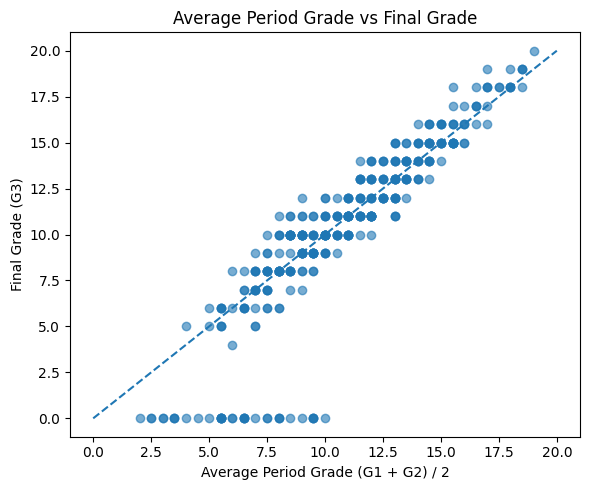

In [92]:
plt.figure(figsize=(6, 5))
plt.scatter(df["avg_period_grade"], df["G3"], alpha=0.6)
plt.plot([0, 20], [0, 20], linestyle="--")
plt.xlabel("Average Period Grade (G1 + G2) / 2")
plt.ylabel("Final Grade (G3)")
plt.title("Average Period Grade vs Final Grade")
plt.tight_layout()
plt.show()

In [81]:
school_mapper = {
    'GP': 'Gabriel Pereira',
    'MS': 'Mousinho da Silveira'
}

df["school"] = df["school"].replace(school_mapper)

In [82]:
sex_mapper = {
    'F': 'Female',
    'M': 'Male'
}

df["sex"] = df["sex"].replace(sex_mapper)

In [83]:
(
    df
    .groupby(by="school")
    .agg(
        number_of_students=("school", "count"), 
        female_students=("sex", lambda sex: (sex == "Female").sum()),
        male_students=("sex", lambda sex: (sex == "Male").sum())

    )
)

,number_of_students,female_students,male_students
school,,,
Gabriel Pereira,349,183,166
Mousinho da Silveira,50,25,25


In [84]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,avg_period_grade
0,Gabriel Pereira,Female,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,5.5
1,Gabriel Pereira,Female,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,5.0
2,Gabriel Pereira,Female,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,7.5
3,Gabriel Pereira,Female,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,14.5
4,Gabriel Pereira,Female,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,Mousinho da Silveira,Male,19,U,LE3,T,1,1,other,at_home,...,2,3,3,3,5,5,8,9,9,8.5
395,Mousinho da Silveira,Male,18,U,GT3,T,4,4,teacher,services,...,3,2,1,2,4,0,8,7,7,7.5
396,Mousinho da Silveira,Male,17,U,GT3,T,4,4,teacher,services,...,3,2,1,2,4,0,8,7,7,7.5
397,Mousinho da Silveira,Male,19,U,GT3,T,4,4,teacher,other,...,3,2,1,2,4,0,8,7,7,7.5


### Why Did They Choose this University?

In [85]:
df["reason"].value_counts()

reason
course        147
home          109
reputation    107
other          36
Name: count, dtype: int64

In [86]:
(
    df
    .groupby(by="school")
    .agg(
        course=("reason", lambda reason: (reason == "course").sum()), 
        home=("reason", lambda reason: (reason == "home").sum()),
        reputation=("reason", lambda reason: (reason == "reputation").sum()), 
        other=("reason", lambda reason: (reason == "other").sum())
    )
)

,course,home,reputation,other
school,,,,
Gabriel Pereira,124,98,100,27
Mousinho da Silveira,23,11,7,9


In [87]:
df_grouped = (
    df
    .groupby(by="school")
    .agg(
        course=("reason", lambda reason: (reason == "course").sum()), 
        home=("reason", lambda reason: (reason == "home").sum()),
        reputation=("reason", lambda reason: (reason == "reputation").sum()), 
        other=("reason", lambda reason: (reason == "other").sum())
    )
    .reset_index()
)

fig = go.Figure()

fig.add_trace(go.Bar(
    x=df_grouped["school"],
    y=df_grouped["course"],
    name="course"
))

fig.add_trace(go.Bar(
    x=df_grouped["school"],
    y=df_grouped["home"],
    name="home"
))

fig.add_trace(go.Bar(
    x=df_grouped["school"],
    y=df_grouped["reputation"],
    name="reputation"
))

fig.add_trace(go.Bar(
    x=df_grouped["school"],
    y=df_grouped["other"],
    name="other"
))

# Stack bars vertically
fig.update_layout(
    barmode='stack',
    title="Reasons by School",
    xaxis_title="School",
    yaxis_title="Count",
    width=800,
    height=500,
    xaxis_tickangle=-45
)

fig.update_traces(width=0.6)
fig.show()

In [88]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,avg_period_grade
0,Gabriel Pereira,Female,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,5.5
1,Gabriel Pereira,Female,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,5.0
2,Gabriel Pereira,Female,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,7.5
3,Gabriel Pereira,Female,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,14.5
4,Gabriel Pereira,Female,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,Mousinho da Silveira,Male,19,U,LE3,T,1,1,other,at_home,...,2,3,3,3,5,5,8,9,9,8.5
395,Mousinho da Silveira,Male,18,U,GT3,T,4,4,teacher,services,...,3,2,1,2,4,0,8,7,7,7.5
396,Mousinho da Silveira,Male,17,U,GT3,T,4,4,teacher,services,...,3,2,1,2,4,0,8,7,7,7.5
397,Mousinho da Silveira,Male,19,U,GT3,T,4,4,teacher,other,...,3,2,1,2,4,0,8,7,7,7.5
